# Top 7 Countries by Median Yearly Salary vs Job Count (2.15.2) - Problem

Problem Statement:
Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


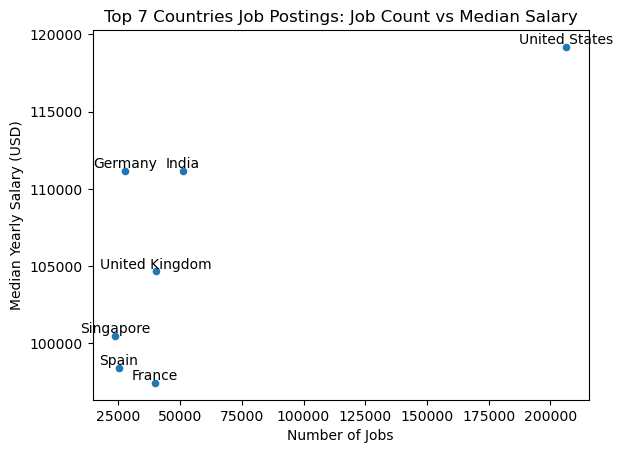

In [6]:
# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
   job_count = top_countries['job_count'].iloc[i]
   mean_salary = top_countries['median_salary_year_avg'].iloc[i]
   country = top_countries.index[i]
   plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()